In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("20년 10월.csv", encoding = 'cp949')

In [66]:
#구매자 지역 정보 데이터에서 ~시, ~군만 추출한 리스트

df_sigun = df["주소"].str.extract('(\w*시)|(\w*군)')

si_list = [i for i in df_sigun.dropna(subset = [0])[0]]

gun_list = [i for i in df_sigun.dropna(subset = [1])[1]]

sell_list = si_list + gun_list

In [67]:
#국내 시, 군 지역 리스트

df_region = pd.read_excel("전국행정동리스트.xlsx")

region_list = [i for i in df_region['Unnamed: 1']]

region_set = set(region_list)

region_set.remove('시 / 군')

region_set.update(['광주광역시', '대구광역시', '대전광역시', '부산광역시',
                  '세종특별자치시', '서울특별시', '울산광역시', '인천광역시', '제주시'])

sigun_list = list(region_set)

In [68]:
def count_dict(key_list, target_list):
    result = {}
    
    for key in range(len(key_list)):
        count = 0

        for target in target_list:
            if key_list[key] == target:
                count += 1
            else:
                pass

        result[key_list[key]] = count
        
    return result

In [69]:
def descending_order(dic): # Value값을 기준으로 내림차순 정렬
    return dict(sorted(dic.items(), key = lambda item: item[1], reverse = True))


In [70]:
def drawbar_top10(dic): #상위 10개 값만 차트로 출력
    x, y = zip(*dic.items()) #key, value 튜플 형식으로 나누기 리턴값은 리스트

    plt.bar(x[:10], y[:10])
    plt.rcParams['figure.figsize'] = [10, 5]

In [71]:
final_dict = descending_order(count_dict(sigun_list, sell_list)) 

In [78]:
del final_dict['서울특별시']

In [79]:
final_dict

{'부산광역시': 224,
 '대구광역시': 175,
 '인천광역시': 157,
 '광주광역시': 112,
 '대전광역시': 102,
 '수원시': 89,
 '용인시': 75,
 '성남시': 69,
 '청주시': 61,
 '울산광역시': 59,
 '고양시': 54,
 '천안시': 52,
 '부천시': 51,
 '화성시': 50,
 '창원시': 49,
 '안산시': 47,
 '안양시': 43,
 '남양주시': 41,
 '춘천시': 39,
 '전주시': 38,
 '포항시': 37,
 '세종특별자치시': 34,
 '진주시': 33,
 '경산시': 32,
 '평택시': 32,
 '의정부시': 30,
 '원주시': 29,
 '군포시': 29,
 '파주시': 27,
 '광주시': 26,
 '광명시': 26,
 '시흥시': 24,
 '여수시': 23,
 '양산시': 22,
 '순천시': 22,
 '하남시': 21,
 '목포시': 19,
 '아산시': 18,
 '김해시': 17,
 '양주시': 16,
 '구리시': 16,
 '강릉시': 15,
 '김포시': 14,
 '안성시': 13,
 '익산시': 12,
 '제주시': 12,
 '포천시': 11,
 '충주시': 11,
 '의왕시': 10,
 '이천시': 10,
 '군산시': 10,
 '경주시': 8,
 '논산시': 8,
 '광양시': 7,
 '홍성군': 7,
 '거제시': 7,
 '안동시': 7,
 '당진시': 7,
 '연천군': 7,
 '구미시': 7,
 '김천시': 6,
 '화순군': 6,
 '영주시': 6,
 '오산시': 6,
 '가평군': 5,
 '과천시': 5,
 '무안군': 4,
 '보령시': 4,
 '진천군': 4,
 '태백시': 4,
 '양평군': 4,
 '영천시': 4,
 '울진군': 4,
 '사천시': 4,
 '제천시': 4,
 '김제시': 4,
 '정읍시': 4,
 '공주시': 3,
 '밀양시': 3,
 '고성군': 3,
 '여주시': 3,
 '서산시': 3,
 '보은군': 3,
 '남원시': 3,
 '

In [80]:
#서울시에 속하는 행정구 리스트

seoulgu_list = [i for i in df_region[df_region['전국행정동리스트'] == '서울특별시']['Unnamed: 2']]

seoulgu_set = set(seoulgu_list)

seoulgu_list = list(seoulgu_set) 

In [81]:
#~구만 추출한 리스트

df_seoulgu = df["주소"].str.extract('(\w*구)')

sell_list = [i for i in df_seoulgu.dropna(subset = [0])[0]] 

In [82]:
seoul_dict = descending_order(count_dict(seoulgu_list, sell_list))

In [83]:
seoul_dict

{'강남구': 90,
 '송파구': 66,
 '동작구': 59,
 '서초구': 53,
 '동대문구': 52,
 '마포구': 50,
 '노원구': 48,
 '성동구': 47,
 '영등포구': 45,
 '관악구': 44,
 '강서구': 42,
 '서대문구': 40,
 '성북구': 37,
 '중구': 34,
 '광진구': 32,
 '용산구': 30,
 '강동구': 30,
 '구로구': 28,
 '종로구': 27,
 '양천구': 26,
 '은평구': 22,
 '도봉구': 20,
 '중랑구': 19,
 '강북구': 14,
 '금천구': 7}

Text(0.5, 1.0, '서울시 행정구별 판매량')

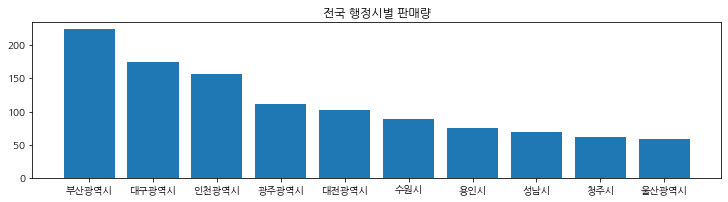

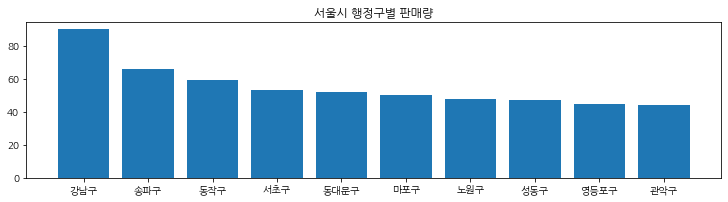

In [84]:
plt.subplots(constrained_layout=True) #차트 간격 자동조절
plt.subplot(211)
drawbar_top10(final_dict)
plt.title('전국 행정시별 판매량')

plt.subplots(constrained_layout=True) #차트 간격 자동조절
plt.subplot(212)
drawbar_top10(seoul_dict)
plt.title('서울시 행정구별 판매량')